# Activity 02: Fundamentals of Linear Algebra for Machine Learning and Data Science (Part 1)
$_{\text{Machine Learning / Deep Learning Course | © D.J. Lopez 2023}}$

In [9]:
## Don't edit this cell nor import any other libraries in any part of this notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Part 1

Using the dictionary `word_dict`: 

*   Determine the similarity of the keys to each other. 
*   Plot the similarity and provide insights using the plotted visualization.
*   Display a confusion matrix with values similar to the table below

|    |   w1   |   w2   |   w3  |   w4  |
|----|--------|--------|-------|-------|
|w1  |  1     |  0.793 |  0.823|  0.609|
|w2  | 0.793  |  1     |  0.999|  0    |
|w3  | 0.823  |  0.999 |  1    |  0.051|
|w4  | 0.609  |  0     |  0.051|  1    |

In [10]:
word_dict = {'conflagration': ['0.0513', '0.9788'],
             'mayhem': ['0.7540', '0.8824'],
             'cataclysm': ['0.6115', '0.9788'],
             'serenity': ['-0.8824', '0.754']}

In [11]:
# Insert code here
df = pd.DataFrame.from_dict(word_dict)

# converting the dictionary to a 2D numpy array
array = np.array(list(word_dict.values()), dtype=float) # 2d array containing the words in word_dict

# determining the similarities of the keys between the rows of the array
row_array = np.linalg.norm(array, axis = 1) # 1d array containing the euclidian norm in the row array
similarity = np.dot(array, array.T) / np.outer(row_array, row_array) 

print("The similarities of the keys are: \n", similarity)

The similarities of the keys are: 
 [[1.         0.79321208 0.87466482 0.60894547]
 [0.79321208 1.         0.98896776 0.        ]
 [0.87466482 0.98896776 1.         0.1481309 ]
 [0.60894547 0.         0.1481309  1.        ]]


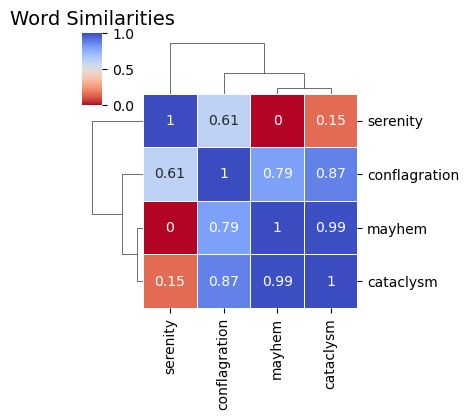

In [35]:
similarity = np.dot(array, array.T) / np.outer(row_array, row_array) # using the same code above
labels = list(word_dict.keys()) # this creates a list of labels for the plotted similarities

plot = pd.DataFrame(similarity, columns=labels, index=labels)

sns.clustermap(plot, cmap='coolwarm_r', annot=True, linewidths=.5, figsize=(4,4))
plt.title('Word Similarities', fontsize=14)
plt.show()

* On the clustered heatmap above, it is evident that *serenity* and *cataclysm* has a low similarity score of **0.15**.
*  *cataclysm* and *conflagration* has a high similarity score of **0.87**.
* *conflagration* and *mayhem* also has a similarity score which is **0.79**. 
* Next would be *mayhem* and *cataclysm* with the similarity score of **0.99**; they had a high similarity score because they are synonyms.
<br><br>
* While *serenity* and *mayhem* has the lowest score of $6.8e^{-18}$ or **0** because they are antonyms.
* Lastly, the words *conflagration*, *mayhem*, and *cataclysm* all have the lowest score with *serenity* considering the fact that they are all serenity's antonyms. 

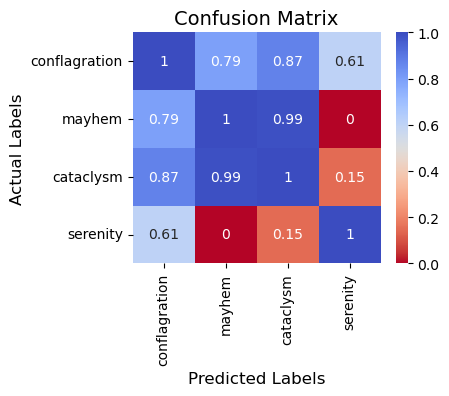

In [124]:
# creating a list of actual and predicted
labels = list(word_dict.keys())
confusion_matrix = pd.DataFrame(similarity, columns=labels, index=labels)

fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(confusion_matrix, cmap='coolwarm_r', annot=True)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('Actual Labels', fontsize=12)
plt.show()

## Part 2

In problem case number of the `mldl_lec_lab_02.ipynb` the quota will be met on Sunday which is the succeeding week. 
Perform three different adjustments/modifications on the variables to successfully meet the quota within the week. 
Justify your adjustments with supporting code to meet the quota and provide business insights.

In [ ]:
# Insert code here

### Part 3

### The Gramian Matrix
A special type of inner product is the inner product between the transpose of a matrix and itself. We can mathematically represent the [Gramian matrix](https://en.wikipedia.org/wiki/Gram_matrix) as:
$$G = X^T\cdot X$$
The Gramian/ gram matrix is an important matrix in machine learning. It can be used in several applications such as analysis of parameters in a dataset, a data representation of a dataset, and as a regularization term in regression algorithms.

To determine the similarity (cosine) for all of the features of a dataset once we need to obtain the inverse of the Gram Matrix $G^{-1}$ and individually divide each element in $G^{-1}$ with the norm of the repective feature pair considered for correlation analysis. In this activity, we will be using solar irradiance for data exploration.

Obtain the dataset [solar_data.csv](https://drive.google.com/file/d/134H03g24vQ5UcRT7GDLQX510HVvCgK3M/view?usp=share_link) and perform analysis of the parameters in the dataset. 
The dataset provided is a satellite (Himawari) numerical data. The columns are temperature (surface temperature), [DHI, DNI, GHI](https://thesolarlabs.com/ros/solar-irradiance-concepts/#:~:text=DHI%20is%20the%20component%20of,beam%20component%20of%20the%20radiation.), [Relative Humidity](https://www.weather.gov/lmk/humidity),[Surface Albedo](https://greenly.earth/en-us/blog/ecology-news/what-is-the-albedo-effect-and-how-does-it-impact-global-warming), [Surface Pressure](https://www.allthingsnature.org/what-is-surface-pressure.htm), [Wind Speed](https://www.lawinsider.com/dictionary/wind-speed). The data is collected can be used for forecasting certain variables such as but not limited to the GHI and Wind Speed.

Use the Gramian Matrix in your analysis. Identify the the top 3 relationships and explain why they are similar. Provide references and citations. 



In [121]:
df = pd.read_csv('solar_data.csv')
df_solar = pd.DataFrame(df)
df_solar

,Temperature,DHI,DNI,GHI,Relative Humidity,Surface Albedo,Pressure,Wind Speed
0,11.0,0,0,0,79.76,0.08,1035,5.4
1,11.0,0,0,0,79.76,0.08,1035,5.4
2,11.0,0,0,0,79.76,0.08,1035,5.3
3,11.1,0,0,0,79.23,0.08,1035,5.3
4,11.1,0,0,0,80.25,0.08,1035,5.3
...,...,...,...,...,...,...,...,...
52699,10.8,0,0,0,79.64,0.08,1035,5.5
52700,10.8,0,0,0,79.64,0.08,1035,5.5
52701,10.9,0,0,0,79.11,0.08,1035,5.4
52702,10.9,0,0,0,80.29,0.08,1035,5.4


In [133]:
# Insert code here
df_solar = pd.read_csv('solar_data.csv', usecols=['DHI', 'DNI', 'GHI', 'Relative Humidity', 'Surface Albedo', 'Pressure', 'Wind Speed'])

X = df_solar.to_numpy() # this will return a numpy version of the dataframe
X = (X - np.min(X)) / (np.max(X) - np.min(X))
theta = np.arccos(X)
gram_1 = np.cos(theta)
gram_2 = np.sin(theta)

---------------------------------------------------------------------------------------------------END OF ASSESSMENT----------------------------------------------------------------------------------------------